# **JSON Based Data Exercise: Getting Started**

In the following notebook, we will use data from the file 'data/world_bank_projects.json' to solve 3 problems:
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Before we get started on the problems though, we'll need to import our JSON and investigate it.

### **Importing Data from the .JSON file**
Using the pandas package, we will read the JSON file into a pandas DataFrame **wb_df.** After it is imported, we'll briefly investigate the DataFrame.

In [1]:
# import json, pandas packages
import json
import pandas as pd

# assign the filepath to variable wb_path
wb_path = 'data/world_bank_projects.json'

# load json as pandas DataFrame
wb_df = pd.read_json(wb_path)

### **Investigate the DataFrame**
Let's check out the DataFrame quickly by looking at the:
- *.shape* (rows, columns)
- *.info* Where we can see data types, column names, and null-values
- *.head()* To glimpse at some of the entries

In [2]:
wb_df.shape

(500, 50)

In [3]:
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [4]:
wb_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


# **Problem 1: Find the 10 Countries with Most Projects**

An initial review of the *.info()*, *.head()*, and *.shape* returns for our JSON DataFrame show that we have 50 columns, 500 rows, and some null-objects dotted throughout. To evaluate which 10 countries have the most projects, let's focus on the following columns:
- project_name
- status
- countryname


### The **project_name**
First, let's check the **project_name** column for multiples to evaluate whether each index is a unique project.

In [5]:
wb_df.project_name.value_counts(sort=True).head()

Vietnam Inclusive Innovation Project                                     1
Judicial Performance Improvement                                         1
Ma'anshan Cihu River Basin Improvement Project                           1
Public Sector Management and Social Inclusion Development Policy Loan    1
Rural Alliances Project II                                               1
Name: project_name, dtype: int64

>*Excellent!* .value_counts() returns 1 count for each value, and our earlier call to .info() shows us that **project_name** has 500 values. 

Next, let's check on the values in the *status* column. Projects might not have started yet, or they might be closed - these changes in the project status could affect our top 10 ranking.

### The **status**

In [6]:
wb_df.status.value_counts()

Active    438
Closed     62
Name: status, dtype: int64

The **status** column has *two* statuses:
- Active
- Closed

Since we aren't sure if *closed* projects are considered when counting the *most* countries, let's generate two series:
- all_most_10, a top 10 list that considers both *Active* and *Closed* projects
- active_most_10, a top 10 list that *only considers Active projects*

To do this, we'll create **df1** a new DataFrame with just the **countryname** and **status** columns. 

### The **countryname**

For the all_most_10 series, we can take *.value_counts()* of **df1.countryname** to get the **Most Projects by Country**, and chain the *.head(10)* so the series returns **The top 10.**

# **Solution 1: Top 10 Countries with the Most Projects**

In [7]:
df1 = wb_df[['countryname','status']]
all_most_10 = df1.countryname.value_counts()
all_most_10 = all_most_10.reset_index()
all_most_10.columns = ['countryname','project_count']
all_most_10.head(10)

,countryname,project_count
0,People's Republic of China,19
1,Republic of Indonesia,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Kingdom of Morocco,12
6,Nepal,12
7,People's Republic of Bangladesh,12
8,Republic of Mozambique,11
9,Africa,11


>*Awesome!* The *People's Republic of China is tied for Most Projects by Country with the Republic of Indonesia, both having 19.*

To evaluate just the *Active* projects, lets use a comparison operator to return indexes where **df1.status == 'Active'.** Then, we can use *.value_counts()* and *.head(10)* on **countryname** again to see the Top Countries with the Most *Active* Projects!

## **Top 10 Countries with the Most *Active* Projects**

In [8]:
active_most_10 = df1[df1.status == 'Active']
active_most_10 = active_most_10.countryname.value_counts()
active_most_10 = active_most_10.reset_index()
active_most_10.columns = ['countryname','project_count']
active_most_10.head(10)

,countryname,project_count
0,People's Republic of China,19
1,Republic of Indonesia,16
2,Republic of India,15
3,Socialist Republic of Vietnam,14
4,Republic of Yemen,13
5,People's Republic of Bangladesh,12
6,Africa,11
7,Nepal,11
8,Republic of Mozambique,9
9,Islamic Republic of Pakistan,9


## **Visualizing Top 10 Countries with the Most Projects**

To visualize the top 10 countries with most projects, we'll:
- Customize the dataframes for plotting
- Design the plots

### **Customizing the DataFrames for Plotting**

In [9]:
# import re
import re

# takes a string, returns the last word
def re_replacer(text):
    it = re.finditer('[A-Za-z]+$', text)
    for a in it:
        b = a[0]
        return b

# customize DataFrames for plotting. Values reversed to plot greatest at top with matplotlib.
active_10 = active_most_10.head(10).copy()
all_10 = all_most_10.head(10).copy()

# cleanup country names for visual
active_10.countryname = active_10.countryname.apply(re_replacer)
all_10.countryname = all_10.countryname.apply(re_replacer)

### **Designing the Plots**

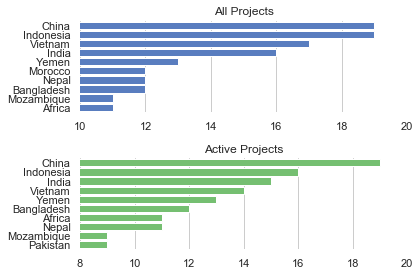

In [10]:
# visualizations to appear inline (in the notebook)
%matplotlib inline

# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set grid, color code
sns.set(style="whitegrid")
sns.set_color_codes("muted")

# add first subplot
plt.subplot(2, 1, 1)
sns.barplot(all_10.project_count, all_10.countryname, color='b')
plt.title('All Projects')

# set axis labels, limits
plt.xlabel('')
plt.ylabel('')
plt.xlim(10,20)

# add second subplot
plt.subplot(2, 1, 2)
sns.barplot(active_10.project_count, active_10.countryname, color='g')
plt.title('Active Projects')

# set axis labels, limits
plt.xlabel('')
plt.ylabel('')
plt.xlim(8,20)

# Display the plots
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

When we consider just the *active projects*, the **Kingdom of Morocco** falls out of the top 10, and the **Islamic Republic of Pakistan** makes the list. 

# **Problem 2: Find the top 10 Major Project Themes (using column'mjtheme_namecode')**

In order to find the top 10 major project themes using the column **mjtheme_namecode**, we can normalize the json text and specify **mjtheme_namecode** to return a DataFrame with the nested string separated into indexes. Since some of the **name** fields are missing, we'll use the *.value_counts()* method to return the frequency of the project theme codes in the **code** column.

Also, to help identify which **code** values come up on top, we'll create a DataFrame with the unique code-name values to reference for our top 10.

In [11]:
# get normalize function from pandas for json io
from pandas.io.json import json_normalize

# load json as string
wb_string = json.load(open(wb_path))

# normalize the 'mjtheme_namecode' nested strings
theme_namecode_df = json_normalize(wb_string, 'mjtheme_namecode')
theme_namecode_df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


### **Create the unique *code, name* DataFrame**
To get the top 10 major project themes, let's first create a DataFrame of the codes and their resspective names; this will also be useful in solving **problem 3** later. To do this, we will:
- isolate unique values with *.drop_duplicates()*
- remove empty fields in the name column by selecting fields with values using the *!=* operator
- improve the readability of the DataFrame by:
 - changing the code type to 'int64' and sorting it
 - resetting the index

In [12]:
# set the DataFrame to a simple variable to work with
t = theme_namecode_df.copy()

# remove duplicates to isolate unique values
t = t.drop_duplicates()

# remove '' name values
t = t[t.name != '']

# convert the data type for column 'code' to 'int64'
t.code = t.code.astype('int64')

# improve readability: sort code values, reset index
code_name_df = t.sort_values('code').reset_index(drop=True)
code_name_df

,code,name
0,1,Economic management
1,2,Public sector governance
2,3,Rule of law
3,4,Financial and private sector development
4,5,Trade and integration
5,6,Social protection and risk management
6,7,Social dev/gender/inclusion
7,8,Human development
8,9,Urban development
9,10,Rural development


*Cool!* Now, let's find out which project codes were used the most by applying the *.value_counts()* method to the theme_namecode_df **code** column.

In [13]:
theme_namecode_df.code.value_counts()

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: code, dtype: int64

It'll be easier understanding the top 10 project themes if we can include the names. Let's reference the **code_name_df** from earlier, and use a *left* join on the **code** column with the method *pd.merge()*. 

Before we can merge the project names and their counts, we'll need to convert the counts to a DataFrame. Also, to merge the two DataFrames together, we'll need to make sure both **code** columns are the same *dtype*. To sum up, we're going to create a final DataFrame with the Project Codes, the Code Counts, and the Project Name by:
- Creating a DataFrame with the code counts
- Converting the **code** column to 'int64' with the *.astype()* method
- Merging the two DataFrames together using the .merge() method, passing *how='left* as an argument to maintain the counts DataFrame

### **Make a DataFrame from the Counts**

In [14]:
# assign the value counts to an easy variable
t = theme_namecode_df.code.value_counts()

# create dataframe, reset index to break out the project codes
t = pd.DataFrame(t).reset_index()

# rename the columns
t.columns = ['code', 'counts']

# convert the column type to 'int64'
t.code = t.code.astype('int64')

# set DataFrame to a variable
code_counts_df = t

### **Merge the DataFrames to Produce a frame with the project *code, counts, and name***

In [15]:
# Merge DataFrames on the column 'code'
t = pd.merge(code_counts_df, code_name_df, how='left', on='code')

# Sort values with counts ascending
t = t.sort_values('counts', ascending=False)

# set DataFrame to variable
projects_df = t

# **Solution 2: The Top 10 Major Project Themes**

Below are the Top 10 Major Project Themes, using the JSON nested string *mjtheme_namecode* as a starting point.

In [16]:
projects_df

,code,counts,name
0,11,250,Environment and natural resources management
1,10,216,Rural development
2,8,210,Human development
3,2,199,Public sector governance
4,6,168,Social protection and risk management
5,4,146,Financial and private sector development
6,7,130,Social dev/gender/inclusion
7,5,77,Trade and integration
8,9,50,Urban development
9,1,38,Economic management


**Environment and natural resources management** was counted 250 times, meaning over half the projects listed in the starting JSON dataset registered this project theme!

## **Visualizing the Top 10 Major Project Themes**

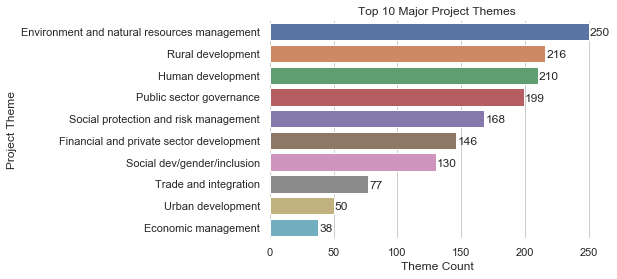

In [17]:
# assign the top 10 project themes to a variable using .head(10)
t = projects_df.head(10)

# set grid, color code
sns.set(style="whitegrid")
sns.set_color_codes("muted")

# Plot the top 10 as horizontal bar graph with seaborn
sns.barplot(t.counts, t.name)
plt.title('Top 10 Major Project Themes')

# set axis labels
plt.xlabel('Theme Count')
plt.ylabel('Project Theme')

# includes the code counts as string beside the bar
for i, v in enumerate(t.counts):
    plt.text(v + 1, i + .2, str(v))

# despines the graph
sns.despine(left=True, bottom=True)
plt.show()

# **Problem 3: Create a DataFrame with the Missing Names Filled In**

We noticed earlier that the initial DataFrame created when we normalized the JSON file had some blank entries in the name column. To create a DataFrame with those missing names filled in, lets use the **.merge()** method to merge in the **code_name_df** DataFrame we created earlier, joining the two DataFrames on the **code** column.

Note: Since we changed the **code_name_df code** column type to 'int64' earlier, we'll need to also switch the original DataFrame **code** column type to 'int64' before they can be joined.

In [18]:
# copy the original DataFrame to the variable t so we maintain the original DataFrame
t = theme_namecode_df.copy()

# pop off the 'name' column
t.pop('name')

# convert the 'code' column to 'int64'
t.code = t.code.astype('int64')

t = pd.merge(t,code_name_df, on='code', how='left')
filled_namecode_df = t

## **Checking the Filled DataFrame**

Now that we've joined the code_name_df to our theme_namecode_df to create a new **filled_namecode_df**, let's check:
- .head(), .tail()
- len()
- the number of ''

### ***.head()* Before & After**

In [19]:
print(theme_namecode_df.head())
print(filled_namecode_df.head())

  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration
   code                                          name
0     8                             Human development
1    11  Environment and natural resources management
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration


### ***.tail()* Before & After**

In [20]:
print(theme_namecode_df.tail())
print(filled_namecode_df.tail())

     code                                      name
1494   10                         Rural development
1495    9                         Urban development
1496    8                         Human development
1497    5                     Trade and integration
1498    4  Financial and private sector development
      code                                      name
1494    10                         Rural development
1495     9                         Urban development
1496     8                         Human development
1497     5                     Trade and integration
1498     4  Financial and private sector development


### ***len()* Check**

In [21]:
len(theme_namecode_df) == len(filled_namecode_df)

True

### **Check the Filled DataFrame for '' in the *Name* Column**

In [22]:
# number of items return from new 'name' equals ''
len(filled_namecode_df[filled_namecode_df.name == ''])

0